In [1]:
# 3 fruits - apple, orange, and banana
# 2 features - weight(grams) and sweetness (0-10 scale)

# class 
# 0 = Apple
# 1 = Orange
# 2 = Banana 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier
from sklearn.preprocessing import StandardScaler

In [3]:
X = np.array([
    # apple 
    [140, 4.5],
    [150, 4.0],
    [160, 5.0],
    # orange
    [130, 6.0],
    [120, 5.5],
    [110, 6.5],
    # banana
    [100, 8.0],
    [90, 7.5],
    [80, 8.5]
])

y = np.array([0, 0, 0, 1, 1, 1, 2, 2, 2])

In [4]:
# label 
labels = ['Apple', 'Orange', 'Banana']
# color 
colors = ['red', 'orange', 'yellow']

In [5]:
print(f"class labels: {labels}")
print(f"color labels: {colors}")

class labels: ['Apple', 'Orange', 'Banana']
color labels: ['red', 'orange', 'yellow']


In [6]:
# one vs rest 
# 3 separate SVMs
# SVM 1 -> Apple Vs (Orange + Banana)
# SVM 2 -> Orange Vs (Apple + Banana)
# SVM 3 -> Banana Vs (Apple + Orange)

In [7]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [8]:
# one vs rest
ovr = OneVsRestClassifier(SVC(kernel='linear', C = 10, random_state=42))
ovr.fit(X_scaled, y)

,estimator,"SVC(C=10, ker...ndom_state=42)"
,n_jobs,None
,verbose,0
,C,10
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001


In [9]:
print("Ovr -> Trained ", len(ovr.estimators_), " binary SVMs")

Ovr -> Trained  3  binary SVMs


In [10]:
# show each classifier's learned 

for i , clf  in enumerate(ovr.estimators_):
    print(f"SVM {i+1} -> {labels[i]} vs Rest")
    print(f" -> support vectors: {clf.support_vectors_}")
    print(f" -> dual coefficients shape: {clf.dual_coef_.shape}")
    print()

SVM 1 -> Apple vs Rest
 -> support vectors: [[ 0.38729833 -0.1118034 ]
 [ 0.         -0.4472136 ]
 [ 0.77459667 -1.11803399]]
 -> dual coefficients shape: (1, 3)

SVM 2 -> Orange vs Rest
 -> support vectors: [[ 0.77459667 -1.11803399]
 [ 1.161895   -1.45344419]
 [ 1.54919334 -0.78262379]
 [-0.77459667  1.22983739]
 [-1.161895    0.89442719]
 [-1.54919334  1.56524758]
 [ 0.38729833 -0.1118034 ]
 [ 0.         -0.4472136 ]
 [-0.38729833  0.2236068 ]]
 -> dual coefficients shape: (1, 9)

SVM 3 -> Banana vs Rest
 -> support vectors: [[-0.38729833  0.2236068 ]
 [-0.77459667  1.22983739]
 [-1.161895    0.89442719]]
 -> dual coefficients shape: (1, 3)



In [11]:
# one vs one (OvO) more classifiers for balanced datasets
# SVM A -> Apple Vs Orange
# SVM B -> Apple Vs Banana
# SVM C -> Orange Vs Banana

ovo = OneVsOneClassifier(SVC(kernel='linear', C = 10, random_state=42))
ovo.fit(X_scaled, y)



,estimator,"SVC(C=10, ker...ndom_state=42)"
,n_jobs,None
,C,10
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200


In [12]:
print("Ovo -> Trained ", len(ovo.estimators_), " binary SVMs")

for i , clf  in enumerate(ovo.estimators_):
    print(f"SVM {i+1} -> {labels[i//2]} vs {labels[i%2 + (i//2) + 1]}")
    print(f" -> support vectors: {clf.support_vectors_}")
    print(f" -> dual coefficients shape: {clf.dual_coef_.shape}")
    print()

Ovo -> Trained  3  binary SVMs
SVM 1 -> Apple vs Orange
 -> support vectors: [[ 0.77459667 -1.11803399]
 [ 0.38729833 -0.1118034 ]
 [ 0.         -0.4472136 ]]
 -> dual coefficients shape: (1, 3)

SVM 2 -> Apple vs Banana
 -> support vectors: [[ 0.77459667 -1.11803399]
 [-0.77459667  1.22983739]
 [-1.161895    0.89442719]]
 -> dual coefficients shape: (1, 3)

SVM 3 -> Orange vs Banana
 -> support vectors: [[-0.38729833  0.2236068 ]
 [-0.77459667  1.22983739]
 [-1.161895    0.89442719]]
 -> dual coefficients shape: (1, 3)



In [17]:
# visualization of linear kernel - > straight lines 
def plot_regions(model,title,ax):
    h = 0.02
    x_min , x_max = X_scaled[:, 0].min() - 0.8, X_scaled[:, 0].max() + 0.8
    y_min , y_max = X_scaled[:, 1].min() - 0.8, X_scaled[:, 1].max() + 0.8
    xx, yy = np.meshgrid(np.arange(x_min , x_max , h)
                            , np.arange(y_min , y_max , h))
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    for i in range(len(labels)):
        mask = y == i
        ax.scatter(X_scaled[mask, 0], X_scaled[mask, 1], c=colors[i], label=labels[i], edgecolor='k', s=120)
        
    ax.set_title(title ,fontsize=14)
    ax.set_xlabel('Weight (scaled)', fontsize=12)
    ax.set_ylabel('Sweetness (scaled)', fontsize=12)
    ax.legend()
    ax.grid(alpha=0.3)     

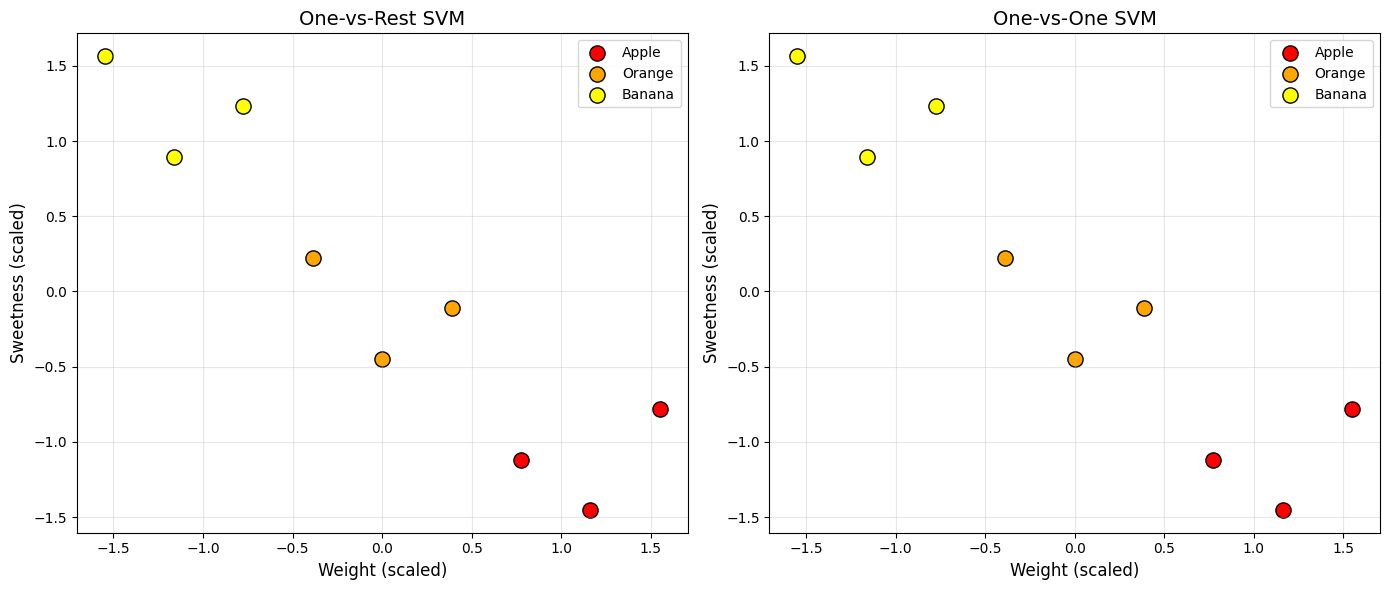

In [18]:
# plot 
fig , (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
plot_regions(ovr, "One-vs-Rest SVM", ax1)
plot_regions(ovo, "One-vs-One SVM", ax2)
plt.tight_layout()
plt.show()